In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

root_dir = "../"
explanation_dir = os.path.join(root_dir, "explanations")
data_dir = os.path.join(root_dir, "data")
figure_dir = os.path.join(data_dir, "figures", "runtime_vs_f1")
os.makedirs(figure_dir, exist_ok=True)

exp_mapper = {
    "hexp/absolute_0": r"h-Shap ($\tau = 0$)",
    "hexp/relative_70": r"h-Shap ($\tau=70\%$)",
    # "gradexp": r"GradientExp",
    # "deepexp": r"DeepExp",
    "partexp/500": r"PartitionExp ($m = 500$)",
    "partexp/64": r"PartitionExp ($m = 64$)",
    "partexp/32": r"PartitionExp ($m = 32$)",
    "partexp/16": r"PartitionExp ($m = 16$)",
    # "gradcam": r"Grad-CAM",
    # "lime": r"LIME",
}

100%|██████████| 6/6 [00:00<00:00, 103.07it/s]


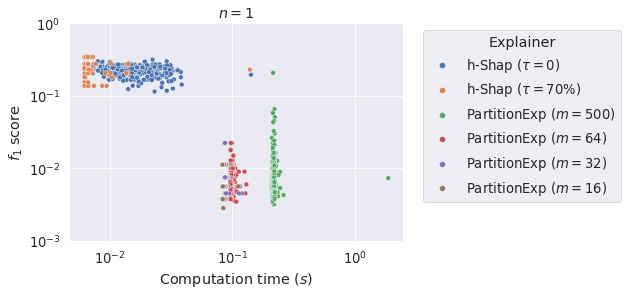

100%|██████████| 6/6 [00:00<00:00, 87.33it/s]


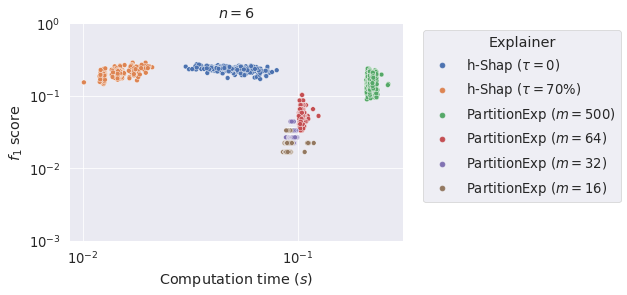

In [2]:
sns.set_theme()
sns.set_context("paper", font_scale=1.5)

for n in [1, 6]:
    df_clips = []
    for exp_name in tqdm(exp_mapper.keys()):
        df = pd.read_csv(os.path.join(explanation_dir, exp_name, f"f1_scores_{n}.csv"))
        df_clips.append(df)
    df = pd.concat(df_clips, axis=0)

    sns.scatterplot(data=df, x="comp_time", y="score", hue="exp_title", legend=True)
    plt.xlabel(r"Computation time ($s$)")
    plt.ylabel(r"$f_1$ score")
    plt.title(r"$n=%d$" % n)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylim([1e-03, 1])
    legend = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title=r"Explainer")

    plt.savefig(os.path.join(figure_dir, f"f1_runtime_{n}.jpg"), bbox_inches="tight")
    plt.savefig(os.path.join(figure_dir, f"f1_runtime_{n}.pdf"), bbox_inches="tight")
    plt.show()
    plt.close()